In [8]:
import pandas as pd
import numpy as np

file_path = r"C:/Users/exam/Downloads/Lab Session Data.xlsx"

sheet_name = 'thyroid0387_UCI'
df = pd.read_excel(file_path, sheet_name=sheet_name)

print("Data types of each column:")
print(df.dtypes)

df_numeric = df.select_dtypes(include=[np.number])

X = df_numeric.iloc[:, :-2].values  # Features
y = df.iloc[:, -2:].values  # Labels

y = np.argmax(y, axis=1)

class1 = 0
class2 = 1

X_class1 = X[y == class1]
X_class2 = X[y == class2]

if X_class1.size == 0 or X_class2.size == 0:
    print("One of the classes has no samples in the data.")
else:
    mean_class1 = np.mean(X_class1, axis=0)
    mean_class2 = np.mean(X_class2, axis=0)

    std_class1 = np.std(X_class1, axis=0)
    std_class2 = np.std(X_class2, axis=0)

    distance_between_means = np.linalg.norm(mean_class1 - mean_class2)

    # Print results
    print(f"Mean vector for class {class1}: {mean_class1}")
    print(f"Standard deviation for class {class1}: {std_class1}")
    print(f"Mean vector for class {class2}: {mean_class2}")
    print(f"Standard deviation for class {class2}: {std_class2}")

Data types of each column:
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
T

First few rows of the DataFrame:
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?          

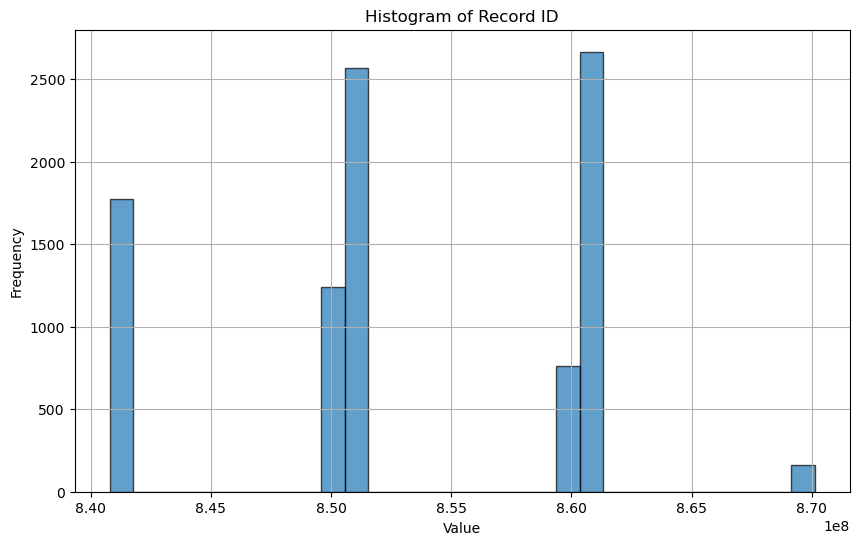

Mean of Record ID: 852947346.6122983
Variance of Record ID: 57479983005406.05


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:/Users/exam/Downloads/Lab Session Data.xlsx"
sheet_name = 'thyroid0387_UCI'
df = pd.read_excel(file_path, sheet_name=sheet_name)
print("First few rows of the DataFrame:")
print(df.head())
feature_column = df.columns[0]
feature_data = df[feature_column].dropna().values  
plt.figure(figsize=(10, 6))
plt.hist(feature_data, bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {feature_column}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)
print(f"Mean of {feature_column}: {mean_value}")
print(f"Variance of {feature_column}: {variance_value}")

Data types of each column:
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
T

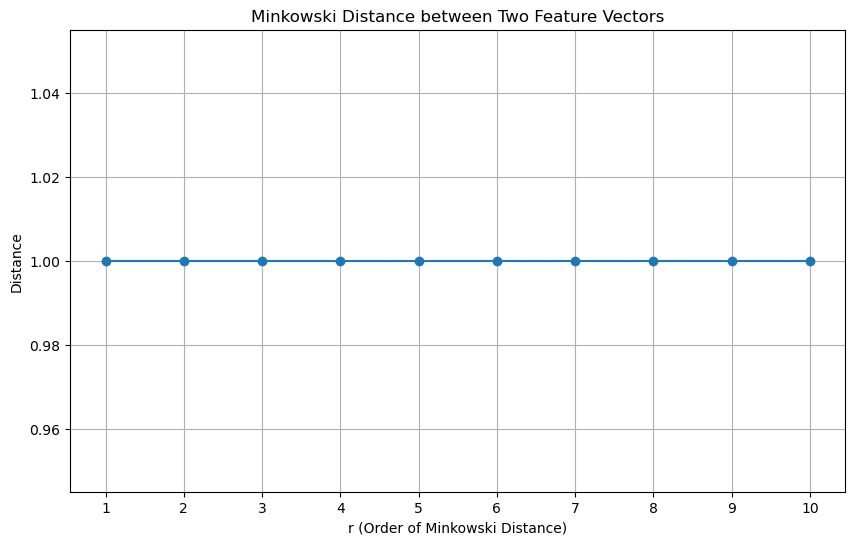

Distance with r=1: 1.0
Distance with r=2: 1.0
Distance with r=3: 1.0
Distance with r=4: 1.0
Distance with r=5: 1.0
Distance with r=6: 1.0
Distance with r=7: 1.0
Distance with r=8: 1.0
Distance with r=9: 1.0
Distance with r=10: 1.0


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

file_path = r"C:/Users/exam/Downloads/Lab Session Data.xlsx"
sheet_name = 'thyroid0387_UCI'
df = pd.read_excel(file_path, sheet_name=sheet_name)
print("Data types of each column:")
print(df.dtypes)
feature_data = df.select_dtypes(include=[np.number])  
vector1 = feature_data.iloc[0].values  
vector2 = feature_data.iloc[1].values
vector1 = np.nan_to_num(vector1)  
vector2 = np.nan_to_num(vector2)
distances = []
r_values = range(1, 11)
for r in r_values:
    try:
        distance = minkowski(vector1, vector2, p=r)
        distances.append(distance)
    except ValueError as e:
        print(f"Error with r={r}: {e}")
        distances.append(np.nan)  

plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Order of Minkowski Distance)')
plt.ylabel('Distance')
plt.xticks(r_values)
plt.grid(True)
plt.show()
for r, dist in zip(r_values, distances):
    print(f"Distance with r={r}: {dist}")